## Plot timeseries of seasonal anomalies at the urban heat map regions

In [1]:
#Deprecated: Pandas 2.0.0
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd 
from shapely.geometry import mapping

def createDf():
    df = pd.DataFrame(columns=['LST_anom', 'loc', 'YOI', 'Season','lat', 'lon','tempDate'])
    return(df)
#Create dfs
dfUrb = createDf()
dfPat = createDf()
dfPisc = createDf()

TOD = 'Day'
years = list(range(2003, 2024))
seasons = ['JJA']
#shp = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/urbanLandUse/NonUrbanToUrban2001_2021.shp'
#gdf = gpd.read_file(shp)
for YOI in years:
    print(f'{YOI}--------')
    for season in seasons:
        print(f'\n[{season}]')
        #Set a temp date for plotting purposes
        dictMonths = {'DJF': '01', 'MAM': '04', 'JJA': '07', 'SON': '10'}
        tempDate = pd.to_datetime(f'{dictMonths[season]}-01-{YOI}')
        print(tempDate)
        # 1. Load in the file
        anomalyFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Seasonal_tifs/{YOI}_{season}_{TOD}.tif'
        print(anomalyFn)
        ds = xr.open_dataset(anomalyFn)
        
        # 2. Clip to area
        urbLat, urbLon = 38.921055,-76.837578
        patLat, patLon = 39.03350,-76.80677
        piscLat, piscLon = 38.68757072231969, -77.04509715717538 #piscataway
        def getNearest(tgtLat,tgtLon):
            ds_point = ds.sel(y=tgtLat, x=tgtLon, method='nearest')
            print(f'   target lon: {tgtLon} target lat: {tgtLat}')
            print(f'   found lon: {ds_point["x"].data} found lat: {ds_point["y"].data}')
            return(ds_point)
        def appendDf(dsOI, loc,df):
            anom = dsOI['band_data'].data
            print(f'    {anom}')
            #columns=['LST_anom', 'YOI', 'Season','lat', 'lon'])
            df = df.append({'LST_anom': float(anom), 'loc': loc, 'YOI': YOI, 'Season': season, 'lat':dsOI["y"].data, 'lon': dsOI["x"].data, 'tempDate' : tempDate}, ignore_index=True)
            return(df)
        
        print(f'\n    Urban')
        dsUrb = getNearest(urbLat,urbLon)
        dfUrb = appendDf(dsUrb,'urban',dfUrb)

        print(f'\n    Patuxent')
        dsPat = getNearest(patLat,patLon)
        dfPat = appendDf(dsPat,'patuxent',dfPat)

        print(f'\n    Piscataway')
        dsPisc = getNearest(piscLat,piscLon)
        dfPisc = appendDf(dsPisc,'piscataway',dfPisc)
#anomalyFn

2003--------

[JJA]
2003-07-01 00:00:00
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2003_JJA_Day.tif

    Urban
   target lon: -76.837578 target lat: 38.921055
   found lon: -76.83703221889726 found lat: 38.920237
    [-0.29599219]


AttributeError: 'DataFrame' object has no attribute 'append'

In [4]:
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd 
from shapely.geometry import mapping

def createDf():
    df = pd.DataFrame(columns=['LST_anom', 'loc', 'YOI', 'Season','lat', 'lon','tempDate'])
    return(df)
#Create dfs
dfUrb = createDf()
dfPat = createDf()
dfPisc = createDf()

TOD = 'Day'
years = list(range(2003, 2024))
seasons = ['JJA']
#shp = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/urbanLandUse/NonUrbanToUrban2001_2021.shp'
#gdf = gpd.read_file(shp)
for YOI in years:
    print(f'{YOI}--------')
    for season in seasons:
        print(f'\n[{season}]')
        #Set a temp date for plotting purposes
        dictMonths = {'DJF': '01', 'MAM': '04', 'JJA': '07', 'SON': '10'}
        tempDate = pd.to_datetime(f'{dictMonths[season]}-01-{YOI}')
        print(tempDate)
        # 1. Load in the file
        anomalyFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Seasonal_tifs/{YOI}_{season}_{TOD}.tif'
        print(anomalyFn)
        ds = xr.open_dataset(anomalyFn)
        
        # 2. Clip to area
        urbLat, urbLon = 38.921055,-76.837578
        patLat, patLon = 39.03350,-76.80677
        piscLat, piscLon = 38.68757072231969, -77.04509715717538 #piscataway
        def getNearest(tgtLat,tgtLon):
            ds_point = ds.sel(y=tgtLat, x=tgtLon, method='nearest')
            print(f'   target lon: {tgtLon} target lat: {tgtLat}')
            print(f'   found lon: {ds_point["x"].data} found lat: {ds_point["y"].data}')
            return(ds_point)
        def appendDf(dsOI, loc, df):
            anom = dsOI['band_data'].data
            print(f'    {anom}')
            # Create a new row as a DataFrame
            new_row = pd.DataFrame({
                'LST_anom': [float(anom)], 
                'loc': [loc], 
                'YOI': [YOI], 
                'Season': [season], 
                'lat': [dsOI["y"].data], 
                'lon': [dsOI["x"].data], 
                'tempDate': [tempDate]
            })
            # Concatenate the new row with the existing DataFrame
            df = pd.concat([df, new_row], ignore_index=True)
            return df
        
        print(f'\n    Urban')
        dsUrb = getNearest(urbLat,urbLon)
        dfUrb = appendDf(dsUrb,'urban',dfUrb)

        print(f'\n    Patuxent')
        dsPat = getNearest(patLat,patLon)
        dfPat = appendDf(dsPat,'patuxent',dfPat)

        print(f'\n    Piscataway')
        dsPisc = getNearest(piscLat,piscLon)
        dfPisc = appendDf(dsPisc,'piscataway',dfPisc)
#anomalyFn

2003--------

[JJA]
2003-07-01 00:00:00
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2003_JJA_Day.tif

    Urban
   target lon: -76.837578 target lat: 38.921055
   found lon: -76.83703221889726 found lat: 38.920237
    [-0.29599219]

    Patuxent
   target lon: -76.80677 target lat: 39.0335
   found lon: -76.80434593228316 found lat: 39.03611033333333
    [-4.44669732]

    Piscataway
   target lon: -77.04509715717538 target lat: 38.68757072231969
   found lon: -77.0413215102354 found lat: 38.688490333333334
    [-5.24695373]
2004--------

[JJA]
2004-07-01 00:00:00
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2004_JJA_Day.tif

    Urban
   target lon: -76.837578 target lat: 38.921055
   found lon: -76.83703221889726 found lat: 38.920237
    [-0.97879523]

    Patuxent
   target lon: -76.80677 target lat: 39.0335
   found lon: -76.80434593228316 found lat: 39.03611033333333
  

/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_2685347/1263964492.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)



    Urban
   target lon: -76.837578 target lat: 38.921055
   found lon: -76.83703221889726 found lat: 38.920237
    [3.25246019]

    Patuxent
   target lon: -76.80677 target lat: 39.0335
   found lon: -76.80434593228316 found lat: 39.03611033333333
    [-4.94419112]

    Piscataway
   target lon: -77.04509715717538 target lat: 38.68757072231969
   found lon: -77.0413215102354 found lat: 38.688490333333334
    [-5.25983971]
2014--------

[JJA]
2014-07-01 00:00:00
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2014_JJA_Day.tif

    Urban
   target lon: -76.837578 target lat: 38.921055
   found lon: -76.83703221889726 found lat: 38.920237
    [2.41269828]

    Patuxent
   target lon: -76.80677 target lat: 39.0335
   found lon: -76.80434593228316 found lat: 39.03611033333333
    [-5.07165886]

    Piscataway
   target lon: -77.04509715717538 target lat: 38.68757072231969
   found lon: -77.0413215102354 found lat: 38.688490333333334
  

In [19]:
#Get monthly
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd 
from shapely.geometry import mapping

def createDf():
    df = pd.DataFrame(columns=['LST_anom', 'loc', 'YOI', 'Season','lat', 'lon','tempDate'])
    return(df)
#Create dfs
dfUrb = createDf()
dfPat = createDf()
dfPisc = createDf()

TOD = 'Day'
years = list(range(2003, 2024))
seasons = ['DJF', 'MAM','JJA', 'SON']
#shp = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/urbanLandUse/NonUrbanToUrban2001_2021.shp'
#gdf = gpd.read_file(shp)
for YOI in years:
    print(f'{YOI}--------')
    for season in seasons:
        print(f'\n[{season}]')
        #Set a temp date for plotting purposes
        dictMonths = {'DJF': '01', 'MAM': '04', 'JJA': '07', 'SON': '10'}
        tempDate = pd.to_datetime(f'{dictMonths[season]}-01-{YOI}')
        print(tempDate)
        # 1. Load in the file
        anomalyFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Seasonal_tifs/{YOI}_{season}_{TOD}.tif'
        print(anomalyFn)
        ds = xr.open_dataset(anomalyFn)
        
        # 2. Clip to area
        urbLat, urbLon = 38.921055,-76.837578
        patLat, patLon = 39.03350,-76.80677
        piscLat, piscLon = 38.68757072231969, -77.04509715717538 #piscataway
        def getNearest(tgtLat,tgtLon):
            ds_point = ds.sel(y=tgtLat, x=tgtLon, method='nearest')
            print(f'   target lon: {tgtLon} target lat: {tgtLat}')
            print(f'   found lon: {ds_point["x"].data} found lat: {ds_point["y"].data}')
            return(ds_point)
        def appendDf(dsOI, loc, df):
            anom = dsOI['band_data'].data
            print(f'    {anom}')
            # Create a new row as a DataFrame
            new_row = pd.DataFrame({
                'LST_anom': [float(anom)], 
                'loc': [loc], 
                'YOI': [YOI], 
                'Season': [season], 
                'lat': [dsOI["y"].data], 
                'lon': [dsOI["x"].data], 
                'tempDate': [tempDate]
            })
            # Concatenate the new row with the existing DataFrame
            df = pd.concat([df, new_row], ignore_index=True)
            return df
        
        print(f'\n    Urban')
        dsUrb = getNearest(urbLat,urbLon)
        dfUrb = appendDf(dsUrb,'urban',dfUrb)

        print(f'\n    Patuxent')
        dsPat = getNearest(patLat,patLon)
        dfPat = appendDf(dsPat,'patuxent',dfPat)

        print(f'\n    Piscataway')
        dsPisc = getNearest(piscLat,piscLon)
        dfPisc = appendDf(dsPisc,'piscataway',dfPisc)
#anomalyFn

2003--------

[DJF]
2003-01-01 00:00:00
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2003_DJF_Day.tif

    Urban
   target lon: -76.837578 target lat: 38.921055
   found lon: -76.83703221889726 found lat: 38.920237
    [-3.49640634]

    Patuxent
   target lon: -76.80677 target lat: 39.0335
   found lon: -76.80434593228316 found lat: 39.03611033333333
    [-4.42307301]

    Piscataway
   target lon: -77.04509715717538 target lat: 38.68757072231969
   found lon: -77.0413215102354 found lat: 38.688490333333334
    [-4.83057301]

[MAM]
2003-04-01 00:00:00
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2003_MAM_Day.tif

    Urban
   target lon: -76.837578 target lat: 38.921055
   found lon: -76.83703221889726 found lat: 38.920237
    [0.43213623]

    Patuxent
   target lon: -76.80677 target lat: 39.0335
   found lon: -76.80434593228316 found lat: 39.03611033333333
    [-1.95369931

/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_2685347/3182651564.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


    [3.31685336]

    Patuxent
   target lon: -76.80677 target lat: 39.0335
   found lon: -76.80434593228316 found lat: 39.03611033333333
    [0.0409971]

    Piscataway
   target lon: -77.04509715717538 target lat: 38.68757072231969
   found lon: -77.0413215102354 found lat: 38.688490333333334
    [-1.10668406]
2008--------

[DJF]
2008-01-01 00:00:00
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2008_DJF_Day.tif

    Urban
   target lon: -76.837578 target lat: 38.921055
   found lon: -76.83703221889726 found lat: 38.920237
    [1.01692699]

    Patuxent
   target lon: -76.80677 target lat: 39.0335
   found lon: -76.80434593228316 found lat: 39.03611033333333
    [-1.44238335]

    Piscataway
   target lon: -77.04509715717538 target lat: 38.68757072231969
   found lon: -77.0413215102354 found lat: 38.688490333333334
    [-1.7783111]

[MAM]
2008-04-01 00:00:00
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/

In [8]:
#get yearly average
def getYearly(df):
    yearly_avg = df.groupby('YOI')['LST_anom'].mean().reset_index()
    # Rename the column for clarity
    #yearly_avg.rename(columns={'LST_anom': 'Yearly_Average'}, inplace=True)
    yearly_avg['tempDate'] = pd.to_datetime(yearly_avg['YOI'].astype(str) + '-06-01')
    return(yearly_avg)

dfPisc = getYearly(dfPisc)
dfUrb = getYearly(dfUrb)
dfPat = getYearly(dfPat)

Slope: 0.0002939486042067555 ± 8.531210199395164e-05
Intercept: 0.30250836736352227 ± 1.844933293477085e-05
Slope: 5.7925126223473824e-05 ± 7.4671862223068e-05
Intercept: -2.7543726907081303 ± 1.61483073891485e-05
Slope: 0.00011869106619307083 ± 7.077101794506722e-05
Intercept: -3.7600909196131074 ± 1.53047227964651e-05


<Figure size 200x100 with 0 Axes>

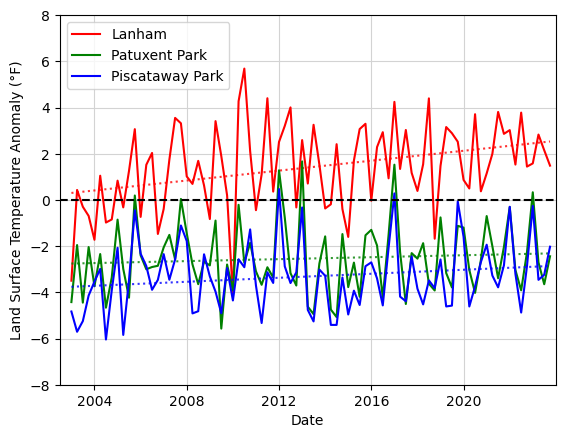

In [22]:
plt.figure(figsize=(2,1))
from scipy.stats import linregress

fig,ax = plt.subplots()
#Format plot 
year_all = [year for year in range(2001, 2024)]
plt.grid(c = 'lightgray')
for year in range(2003, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    #plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#lin regress
def getStats(df):
    df['date_num'] = (df['tempDate'] - df['tempDate'].min()).dt.days
    # Perform linear regression using scipy
    slope, intercept, r_value, p_value, std_err = linregress(df['date_num'], df['LST_anom'])
     # Calculate standard error of the intercept
    N = len(df['date_num'])
    x_mean = df['date_num'].mean()
    SE_intercept = std_err * np.sqrt(np.sum(df['date_num']**2) / (N * np.sum((df['date_num'] - x_mean)**2)))
    
    # Predict temperatures based on the model
    df['temp_pred'] = intercept + slope * df['date_num']
    return(slope, intercept, r_value,p_value, std_err, SE_intercept, df['temp_pred'])
def assignP(P):
        if P < 0.05: pReport = '*'
        elif P < 0.01: pReport = '**'
        elif P < 0.005: pReport = '***'
        else: pReport = ' '
        return pReport
def plotLinRegress(df, colorChoice):
    daySlope, dayInt, dayR, dayP, slope_std_err, intercept_std_err,dayLine = getStats(df)
    plt.plot(df['tempDate'], dayLine, linestyle = 'dotted', alpha = 0.8, c = colorChoice)
    #textbox with P val
    minDiff = df['LST_anom'].min()
    textstr = f'P-value: {str(dayP)[0:4]}{assignP(dayP)}'
    props = dict(boxstyle='round', facecolor='red', alpha=0.3)
    #plt.text(0.05, .5, textstr, transform=plt.gca().transAxes, fontsize=9,
    #         verticalalignment='top', bbox=props)
    print(f'Slope: {daySlope} ± {slope_std_err}')
    print(f'Intercept: {dayInt} ± {intercept_std_err}')

plt.plot(dfUrb['tempDate'],dfUrb['LST_anom'], c = 'r', label = 'Lanham')
plotLinRegress(dfUrb,'r')
plt.plot(dfPat['tempDate'],dfPat['LST_anom'], c = 'g', label = 'Patuxent Park')
plotLinRegress(dfPat,'g')
plt.plot(dfPisc['tempDate'],dfPisc['LST_anom'], c = 'b', label = 'Piscataway Park')
plotLinRegress(dfPisc,'b')

plt.ylabel('Land Surface Temperature Anomaly (°F)')
plt.xlabel('Date')
plt.axhline(y=0, color='black', linestyle='--')
#ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
yearStart, yearEnd = 2002,2023
plt.xlim(pd.Timestamp(yearStart, 7, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(-8,8)
#plt.title(f'Summer MODIS LST anomalies at the nearest pixel\nto PG County points of interest')
outputFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/All_LST_anomalies_POI.png'
plt.savefig(outputFn, dpi=300)  # DPI controls the resolution of the output image

In [54]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping
from concurrent.futures import ProcessPoolExecutor

def process_file(YOI, season, gdf, TOD):
    try:
        print(f'\n      running {season}')
        # 1. Load in the file
        anomalyFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/Seasonal_tifs/{YOI}_{season}_{TOD}.tif'
        print(anomalyFn)
        ds = xr.open_dataset(anomalyFn)
        print(f'      {ds}')
        
        # 2. Clip to shapefile
        masked_ds = ds.rio.clip(gdf.geometry.apply(mapping), gdf.crs, drop=True)
        mean_anom = masked_ds['band_data'][0].mean()
        return {'Mean_Anom': float(mean_anom.data), 'YOI': YOI, 'Season': season}
    except Exception as e:
        print(f'Error processing {YOI} {season}: {e}')
        return None

def main():
    df = pd.DataFrame(columns=['Mean_Anom', 'YOI', 'Season'])
    TOD = 'Day'
    years = list(range(2003, 2004))
    seasons = ['DJF', 'MAM', 'JJA', 'SON']
    shp = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/urbanLandUse/NonUrbanToUrban2001_2021.shp'
    gdf = gpd.read_file(shp)
    
    results = []
    with ProcessPoolExecutor() as executor:
        futures = [executor.submit(process_file, YOI, season, gdf, TOD) for YOI in years for season in seasons]
        for future in futures:
            result = future.result()
            if result:
                results.append(result)
    
    df = pd.DataFrame(results)
    print(df)

if __name__ == "__main__":
    main()



      running DJF
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2003_DJF_Day.tif

      running MAM
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2003_MAM_Day.tif

      running JJA
      <xarray.Dataset>
Dimensions:      (band: 1, x: 51, y: 72)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -77.08 -77.07 -77.07 ... -76.69 -76.68 -76.67
  * y            (y) float64 39.13 39.12 39.11 39.1 ... 38.56 38.56 38.55 38.54
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float64 ...
/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/Day/Composite/Seasonal_tifs/2003_JJA_Day.tif      <xarray.Dataset>
Dimensions:      (band: 1, x: 51, y: 72)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -77.08 -77.07 -77.07 ... -76.69 -76.68 -76.67
  * y            (y) float64 39.13 39.12 39.11 39.1 ... 3

Process ForkProcess-79:
Process ForkProcess-46:
Process ForkProcess-76:
Process ForkProcess-74:
Process ForkProcess-45:
Process ForkProcess-67:
Process ForkProcess-66:
Process ForkProcess-51:
Process ForkProcess-52:
Process ForkProcess-57:
Process ForkProcess-80:
Process ForkProcess-47:
Process ForkProcess-70:
Process ForkProcess-71:
Process ForkProcess-61:
Process ForkProcess-65:
Process ForkProcess-63:
Process ForkProcess-77:
Process ForkProcess-72:
Process ForkProcess-58:
Process ForkProcess-62:
Process ForkProcess-48:
Process ForkProcess-78:
Process ForkProcess-68:
Process ForkProcess-75:
Process ForkProcess-53:
Process ForkProcess-49:
Process ForkProcess-59:
Process ForkProcess-69:
Process ForkProcess-73:
Process ForkProcess-55:
Process ForkProcess-60:
Process ForkProcess-54:
Process ForkProcess-50:
Process ForkProcess-64:
Process ForkProcess-56:
Traceback (most recent call last):

KeyboardInterrupt



In [126]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile
shp = '/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/urbanLandUse/NonUrbanToUrban2001_2021.shp'
gdf = gpd.read_file(shp)

Text(0.5, 1.0, 'NonUrbanToUrban2001_2021.shp')

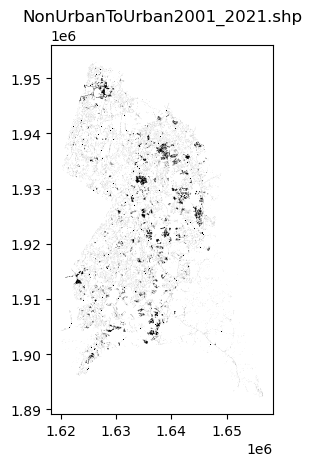

In [127]:
gdf.plot(color = 'black')
plt.title('NonUrbanToUrban2001_2021.shp')

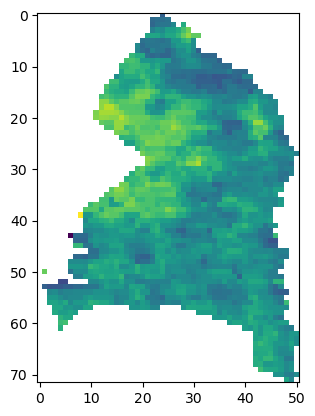

In [21]:
plt.imshow(ds['band_data'][0])

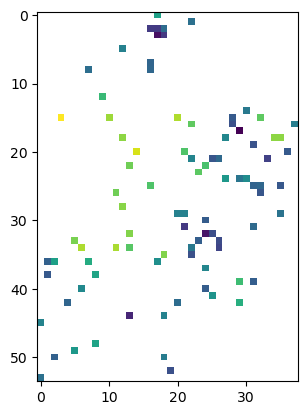

In [22]:
plt.imshow(masked_ds['band_data'][0])
#Patuxent refuge vs near water (more thermal inersia near water)
#Piscataway